**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name:** Atikah Tariq
# **Roll Number:** ME-1924
# **Section:** B

# 🔹 Task 1: Load the Dataset

In [ ]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)


In [ ]:
# Load Dataset (Update path if needed)
url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
df = pd.read_csv(url)
# To display the top 5 rows
df.head(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [ ]:

# Display last 5 rows
df.tail(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [ ]:

# Check data types
df.dtypes


,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [ ]:

# Check dataset shape
df.shape


(180, 15)

# 🔹 Task 2: Data Cleaning

In [ ]:

# Check missing values
print(df.isnull().sum())

S.no            0
Unnamed: 1      0
case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64


In [ ]:
# Fill missing values

df = df.ffill()


print(df.isnull().sum())



S.no           0
Unnamed: 1     0
case           0
run            0
VB             0
time           0
DOC            0
feed           0
material       0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64


### ✍️ Explain how you handled missing values here.



The missing values were filled using the ffill feature.
ffill  is a method used to handle missing data by propagating the last valid observation forward to the next valid one.

In [ ]:

# Check duplicates

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 15)


In [ ]:
df.count()

,0
S.no,180
Unnamed: 1,180
case,180
run,180
VB,180
time,180
DOC,180
feed,180
material,180
smcAC,180


In [ ]:

# Remove duplicates
df = df.drop_duplicates()
df.head(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,0.00,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,0.00,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,0.11,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [ ]:
df.count()

,0
S.no,180
Unnamed: 1,180
case,180
run,180
VB,180
time,180
DOC,180
feed,180
material,180
smcAC,180


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

# Dropping the features not required

In [ ]:
df1=df.drop(['Unnamed: 1', 'time', 'S.no', 'run'],axis=1)
df1.head(5)

,case,VB,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,0.00,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,0.00,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,0.00,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,0.11,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,0.11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [ ]:
mean_vals = df1.mean()
median_vals = df1.median()
mode_vals = df1.mode().iloc[0]

print("Mean:\n", mean_vals)
print("Median:\n", median_vals)
print("Mode:\n", mode_vals)



Mean:
 case           8.616667
VB             0.352556
DOC            1.037500
feed           0.372222
material       1.355556
smcAC         -0.165473
smcDC          1.339518
vib_table      0.079088
vib_spindle    0.287320
AE_table       0.100467
AE_spindle     0.123678
dtype: float64
Median:
 case           10.000000
VB              0.280000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC          -0.184326
smcDC           1.372070
vib_table       0.068359
vib_spindle     0.285645
AE_table        0.101318
AE_spindle      0.121765
dtype: float64
Mode:
 case           11.000000
VB              0.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC           0.249023
smcDC           1.381836
vib_table       0.061035
vib_spindle     0.284424
AE_table        0.092773
AE_spindle      0.110474
Name: 0, dtype: float64


### ✍️ Is tool wear normally distributed? Is mean close to median?

The tool wear is not normally distributed as the mean and median are not equal to each other. The mean is slightly close to the median by a difference of 0.07.

## 2️⃣ Spread (Variation)

In [ ]:

# Variance
variance_vals = df1.var()
print("Variance:\n", variance_vals)


Variance:
 case           23.075698
VB              0.081466
DOC             0.133712
feed            0.015705
material        0.230416
smcAC           0.124111
smcDC           0.033424
vib_table       0.001304
vib_spindle     0.000428
AE_table        0.000576
AE_spindle      0.000437
dtype: float64


In [ ]:
# Range
range_vals = df1.max() - df1.min()
print("Range:\n", range_vals)

Range:
 case           15.000000
VB              1.530000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC           1.176758
smcDC           1.450195
vib_table       0.292969
vib_spindle     0.184326
AE_table        0.149536
AE_spindle      0.181272
dtype: float64


In [ ]:
#IQR

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print("IQR:\n", IQR)

IQR:
 case           9.000000
VB             0.315000
DOC            0.750000
feed           0.250000
material       1.000000
smcAC          0.721436
smcDC          0.040283
vib_table      0.021973
vib_spindle    0.021973
AE_table       0.021973
AE_spindle     0.025787
dtype: float64


### ✍️ Which sensor shows highest variability?

The smcAC sensor shows the highest variability as it has the highest variance and IQR as compared to other sensors.

## 3️⃣ Shape (Distribution)

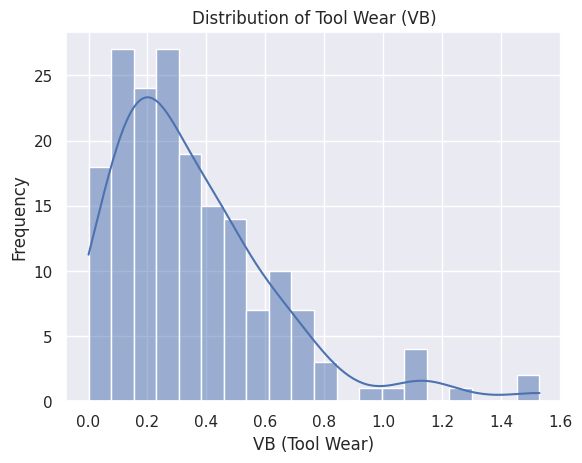

In [ ]:
# Histogram of Tool Wear
sns.histplot(df1['VB'], kde=True, bins=20)
plt.title("Distribution of Tool Wear (VB)")
plt.xlabel("VB (Tool Wear)")
plt.ylabel("Frequency");
plt.show()

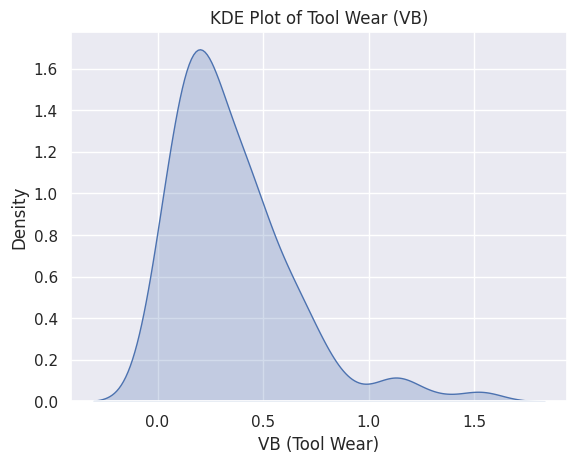

In [ ]:
# KDE Plot
sns.kdeplot(df1['VB'], fill=True)
plt.title("KDE Plot of Tool Wear (VB)")
plt.xlabel("VB (Tool Wear)")
plt.ylabel("Density")
plt.show()

### ✍️ Is distribution symmetric, skewed, or multi-modal?



The distribution is skewed on the positive side with a long "tail" that extends significantly toward the higher values on the right side of the x-axis. It is not symmetric and is not a multi-modal distribution.

## 4️⃣ Outlier Detection

<Axes: xlabel='VB'>

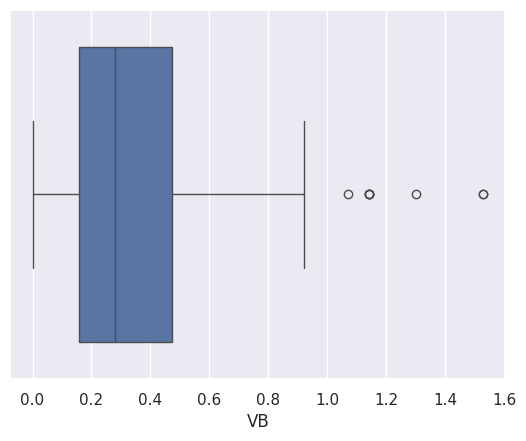

In [ ]:

# Boxplot, IQR, Z-modified score

sns.boxplot(x=df1['VB'])


In [ ]:
median_VB = df1['VB'].median()
abs_dev = np.abs(df1['VB'] - median_VB)
MAD = np.median(abs_dev)

modified_z_score = 0.6745 * abs_dev / MAD

threshold = 3.5

outliers_modified_z = df1[modified_z_score > threshold]
print(f"Number of outliers detected using Modified Z-score: {len(outliers_modified_z)}")


df_no_outliers = df1[modified_z_score <= threshold]
print(f"Shape of DataFrame before outlier removal: {df1.shape}")
print(f"Shape of DataFrame after outlier removal: {df_no_outliers.shape}")



Number of outliers detected using Modified Z-score: 8
Shape of DataFrame before outlier removal: (180, 11)
Shape of DataFrame after outlier removal: (172, 11)


In [ ]:
mean_vals = df_no_outliers['VB'].mean()
median_vals = df_no_outliers['VB'].median()
mode_vals = df_no_outliers['VB'].mode().iloc[0]

print("Mean:\n", mean_vals)
print("Median:\n", median_vals)
print("Mode:\n", mode_vals)

Mean:
 0.31087209302325575
Median:
 0.26
Mode:
 0.0



### ✍️
- **Which method did you use (IQR or Modified Z-score)?**
  I used the Modified Z-Score method.

- **Why?**
  Since we are dealing with a smaller dataset, and a positively skewed data we have decided to use the Modified Z-score method. In a smaller dataset the Modified Z-score method remains reliable for detecting outliers.

- **How many outliers were removed?**  8 outliers that were removed.

- **How did it affect statistics?** The mean and median saw a slight drop in their respective values.


# 🔹 Task 4: Correlation Analysis

<Axes: >

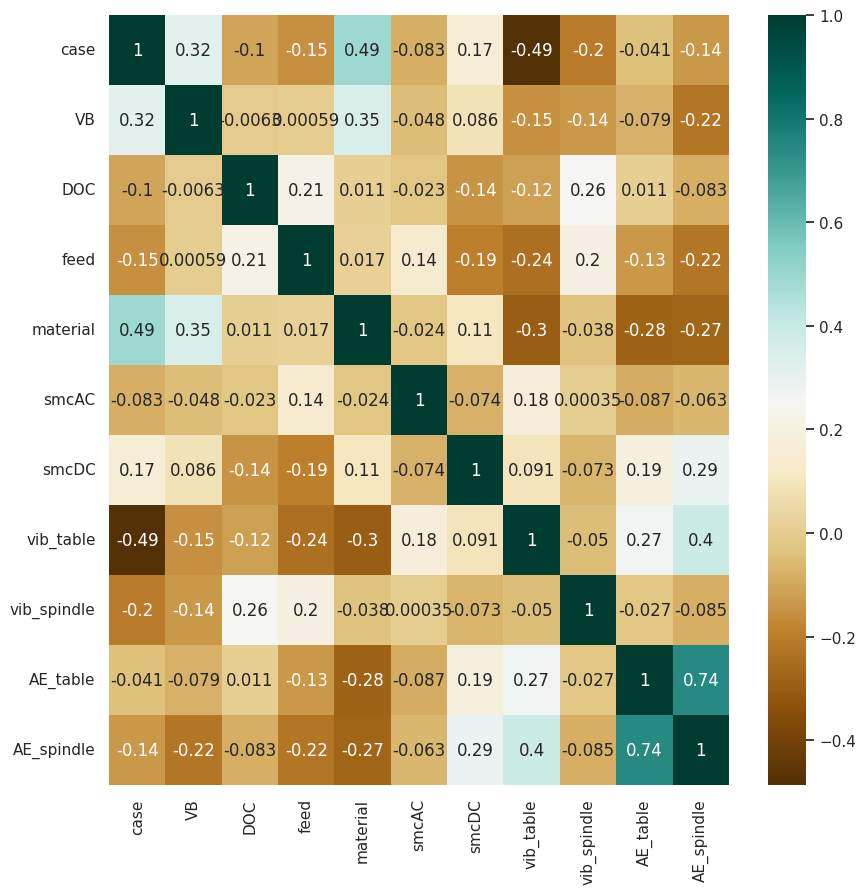

In [ ]:

plt.figure(figsize=(10, 10))
c=df1.corr()
sns.heatmap(c,cmap="BrBG", annot=True)



### ✍️
- **Does tool wear correlate strongly with vibration?** The tool wear does not strongly correlate with vibration. As seen in the heat map, the vib_table and vib_spindle relation with VB is in negatives which shows no relation.

- **Which feature is most predictive?** With respect to tool wear the most predicitve feature is material as it is positive and has a value of 0.35.


# 🔹 Task 5: Additional Visualization

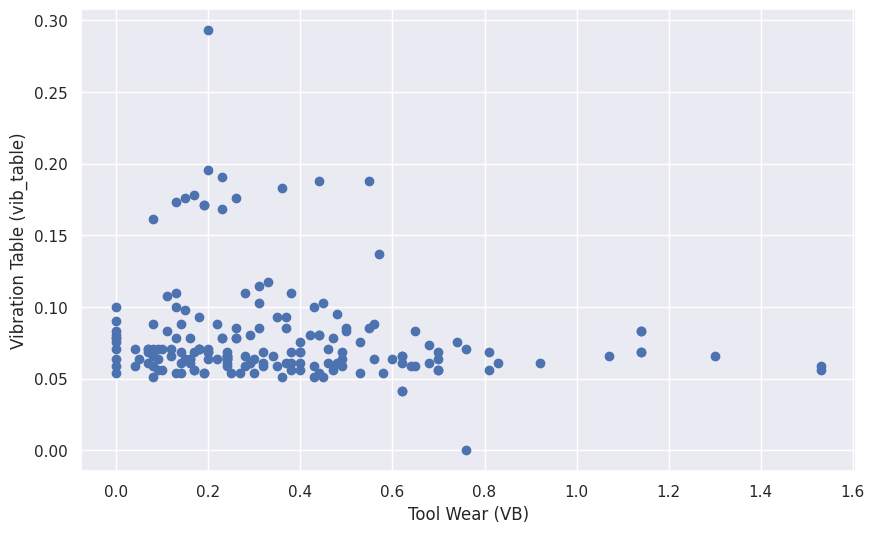

In [ ]:

# Scatter Plot: Example (Tool Wear vs Vibration)
fig, ax = plt.subplots(figsize= (10,6))
ax.scatter(df1['VB'], df1['vib_table'])
ax.set_xlabel('Tool Wear (VB)')
ax.set_ylabel('Vibration Table (vib_table)')
plt.show()


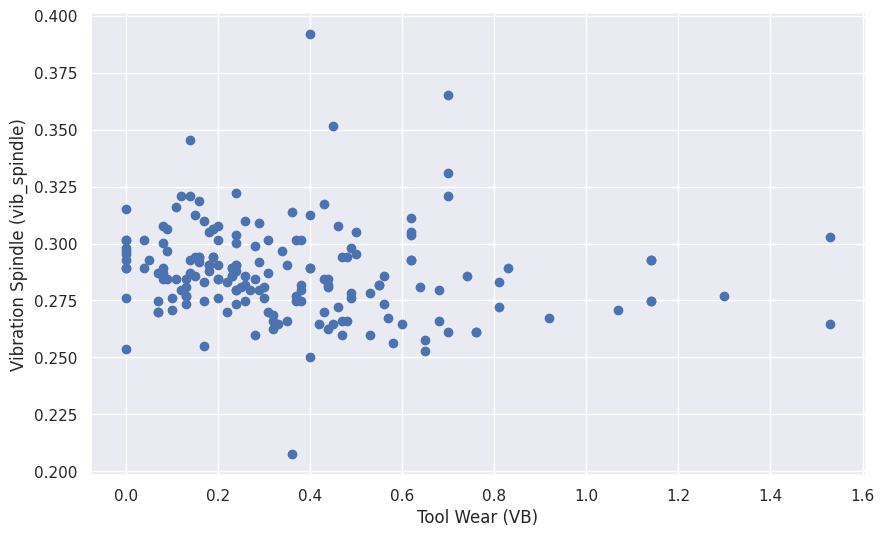

In [ ]:
fig, ax = plt.subplots(figsize= (10,6))
ax.scatter(df1['VB'], df1['vib_spindle'])
ax.set_xlabel('Tool Wear (VB)')
ax.set_ylabel('Vibration Spindle (vib_spindle)')
plt.show()


## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
2. Which sensor signal is most stable?
3. Can tool wear be predicted from sensor data?


Answers

1. The material parameter affects it the most.
2. vib_spindle is the most stable since it has the lowest variance and IQR as compared to other sensors. This indicates that it fluctuates the least.
3. Yes, tool wear can be effectively predicted using sensor data. These sensors capture the physical changes (vibrations, acoustic emissions, and motor current changes) that occur as a cutting tool degrades.